In [58]:
from patchify import patchify, unpatchify
import tifffile as tif
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Read csv file

In [5]:
df = pd.read_csv('../../datasets/ADDA/tiff/training_csv.csv')

In [6]:
df.head()

,subject_id,dataset,ct_path,pet_path,label_path
0,MDA-020.tiff,source,../datasets/ADDA/tiff/images/MDA-020__CT.tiff,../datasets/ADDA/tiff/images/MDA-020__PT.tiff,../datasets/ADDA/tiff/labels/MDA-020.tiff
1,MDA-054.tiff,source,../datasets/ADDA/tiff/images/MDA-054__CT.tiff,../datasets/ADDA/tiff/images/MDA-054__PT.tiff,../datasets/ADDA/tiff/labels/MDA-054.tiff
2,MDA-201.tiff,source,../datasets/ADDA/tiff/images/MDA-201__CT.tiff,../datasets/ADDA/tiff/images/MDA-201__PT.tiff,../datasets/ADDA/tiff/labels/MDA-201.tiff
3,MDA-184.tiff,source,../datasets/ADDA/tiff/images/MDA-184__CT.tiff,../datasets/ADDA/tiff/images/MDA-184__PT.tiff,../datasets/ADDA/tiff/labels/MDA-184.tiff
4,MDA-065.tiff,source,../datasets/ADDA/tiff/images/MDA-065__CT.tiff,../datasets/ADDA/tiff/images/MDA-065__PT.tiff,../datasets/ADDA/tiff/labels/MDA-065.tiff


fix the path to the images

In [9]:
df['ct_path'] = df['ct_path'].apply(lambda x: '../'+x)
df['pet_path'] = df['pet_path'].apply(lambda x: '../'+x)
df['label_path'] = df['label_path'].apply(lambda x: '../'+x)

In [10]:
df.head()

,subject_id,dataset,ct_path,pet_path,label_path
0,MDA-020.tiff,source,../../datasets/ADDA/tiff/images/MDA-020__CT.tiff,../../datasets/ADDA/tiff/images/MDA-020__PT.tiff,../../datasets/ADDA/tiff/labels/MDA-020.tiff
1,MDA-054.tiff,source,../../datasets/ADDA/tiff/images/MDA-054__CT.tiff,../../datasets/ADDA/tiff/images/MDA-054__PT.tiff,../../datasets/ADDA/tiff/labels/MDA-054.tiff
2,MDA-201.tiff,source,../../datasets/ADDA/tiff/images/MDA-201__CT.tiff,../../datasets/ADDA/tiff/images/MDA-201__PT.tiff,../../datasets/ADDA/tiff/labels/MDA-201.tiff
3,MDA-184.tiff,source,../../datasets/ADDA/tiff/images/MDA-184__CT.tiff,../../datasets/ADDA/tiff/images/MDA-184__PT.tiff,../../datasets/ADDA/tiff/labels/MDA-184.tiff
4,MDA-065.tiff,source,../../datasets/ADDA/tiff/images/MDA-065__CT.tiff,../../datasets/ADDA/tiff/images/MDA-065__PT.tiff,../../datasets/ADDA/tiff/labels/MDA-065.tiff


## Test Train Split

#### 1. Source Dataset

In [116]:
source_df = df[df['dataset']=='source']
source_df.head()

,subject_id,dataset,ct_path,pet_path,label_path
0,MDA-020.tiff,source,../../datasets/ADDA/tiff/images/MDA-020__CT.tiff,../../datasets/ADDA/tiff/images/MDA-020__PT.tiff,../../datasets/ADDA/tiff/labels/MDA-020.tiff
1,MDA-054.tiff,source,../../datasets/ADDA/tiff/images/MDA-054__CT.tiff,../../datasets/ADDA/tiff/images/MDA-054__PT.tiff,../../datasets/ADDA/tiff/labels/MDA-054.tiff
2,MDA-201.tiff,source,../../datasets/ADDA/tiff/images/MDA-201__CT.tiff,../../datasets/ADDA/tiff/images/MDA-201__PT.tiff,../../datasets/ADDA/tiff/labels/MDA-201.tiff
3,MDA-184.tiff,source,../../datasets/ADDA/tiff/images/MDA-184__CT.tiff,../../datasets/ADDA/tiff/images/MDA-184__PT.tiff,../../datasets/ADDA/tiff/labels/MDA-184.tiff
4,MDA-065.tiff,source,../../datasets/ADDA/tiff/images/MDA-065__CT.tiff,../../datasets/ADDA/tiff/images/MDA-065__PT.tiff,../../datasets/ADDA/tiff/labels/MDA-065.tiff


In [119]:
# make sure that the number of images match the number of rows
print(source_df.shape[0], source_df['subject_id'].nunique())

184 184


In [120]:
from sklearn.model_selection import train_test_split

In [121]:
# Splitting into train and temp sets first (70% train, 30% temp)
train_df, temp_df = train_test_split(source_df, test_size=0.3, random_state=42)

In [123]:
print(train_df.shape, temp_df.shape)

(128, 5) (56, 5)


In [124]:
# Splitting the temp set into test and validation sets (50% test, 50% validation from the temp set)
test_df, val_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [125]:
print(test_df.shape, val_df.shape)

(28, 5) (28, 5)


In [126]:
# Adding a new column 'set' to indicate to which set each row belongs
train_df['set'] = 'train'
test_df['set'] = 'test'
val_df['set'] = 'validation'

In [ ]:
# Concatenating all sets back into a single DataFrame
source_df_split = pd.concat([train_df, test_df, val_df])

# Resetting the index of the final DataFrame
source_df_split.reset_index(drop=True, inplace=True)

In [128]:

source_df_split.head()

,subject_id,dataset,ct_path,pet_path,label_path,set
0,MDA-039.tiff,source,../../datasets/ADDA/tiff/images/MDA-039__CT.tiff,../../datasets/ADDA/tiff/images/MDA-039__PT.tiff,../../datasets/ADDA/tiff/labels/MDA-039.tiff,train
1,MDA-192.tiff,source,../../datasets/ADDA/tiff/images/MDA-192__CT.tiff,../../datasets/ADDA/tiff/images/MDA-192__PT.tiff,../../datasets/ADDA/tiff/labels/MDA-192.tiff,train
2,MDA-187.tiff,source,../../datasets/ADDA/tiff/images/MDA-187__CT.tiff,../../datasets/ADDA/tiff/images/MDA-187__PT.tiff,../../datasets/ADDA/tiff/labels/MDA-187.tiff,train
3,MDA-179.tiff,source,../../datasets/ADDA/tiff/images/MDA-179__CT.tiff,../../datasets/ADDA/tiff/images/MDA-179__PT.tiff,../../datasets/ADDA/tiff/labels/MDA-179.tiff,train
4,MDA-162.tiff,source,../../datasets/ADDA/tiff/images/MDA-162__CT.tiff,../../datasets/ADDA/tiff/images/MDA-162__PT.tiff,../../datasets/ADDA/tiff/labels/MDA-162.tiff,train


In [129]:
source_df_split['set'].value_counts()

set
train         128
test           28
validation     28
Name: count, dtype: int64

#### 2. Target Dataset

In [130]:
target_df = df[df['dataset']=='target']
target_df.head()

,subject_id,dataset,ct_path,pet_path,label_path
184,CHUP-005.tiff,target,../../datasets/ADDA/tiff/images/CHUP-005__CT.tiff,../../datasets/ADDA/tiff/images/CHUP-005__PT.tiff,../../datasets/ADDA/tiff/labels/CHUP-005.tiff
185,CHUP-022.tiff,target,../../datasets/ADDA/tiff/images/CHUP-022__CT.tiff,../../datasets/ADDA/tiff/images/CHUP-022__PT.tiff,../../datasets/ADDA/tiff/labels/CHUP-022.tiff
186,CHUP-024.tiff,target,../../datasets/ADDA/tiff/images/CHUP-024__CT.tiff,../../datasets/ADDA/tiff/images/CHUP-024__PT.tiff,../../datasets/ADDA/tiff/labels/CHUP-024.tiff
187,CHUP-064.tiff,target,../../datasets/ADDA/tiff/images/CHUP-064__CT.tiff,../../datasets/ADDA/tiff/images/CHUP-064__PT.tiff,../../datasets/ADDA/tiff/labels/CHUP-064.tiff
188,CHUP-051.tiff,target,../../datasets/ADDA/tiff/images/CHUP-051__CT.tiff,../../datasets/ADDA/tiff/images/CHUP-051__PT.tiff,../../datasets/ADDA/tiff/labels/CHUP-051.tiff


In [131]:
# make sure that the number of images match the number of rows
print(target_df.shape[0], target_df['subject_id'].nunique())

72 72


In [138]:
# Splitting into train and temp sets first (70% train, 30% temp)
target_train_df, target_temp_df = train_test_split(target_df, test_size=0.3, random_state=42)

In [139]:
print(target_train_df.shape, target_temp_df.shape)

(50, 5) (22, 5)


In [145]:
# Splitting the temp set into test and validation sets (50% test, 50% validation from the temp set)
target_test_df, target_val_df = train_test_split(target_temp_df, test_size=0.3, random_state=42)

In [146]:
print(target_test_df.shape, target_val_df.shape)

(15, 5) (7, 5)


In [147]:
# Adding a new column 'set' to indicate to which set each row belongs
target_train_df['set'] = 'train'
target_test_df['set'] = 'test'
target_val_df['set'] = 'validation'

In [148]:
# Concatenating all sets back into a single DataFrame
target_df_split = pd.concat([target_train_df, target_test_df, target_val_df])

# Resetting the index of the final DataFrame
target_df_split.reset_index(drop=True, inplace=True)

In [149]:

target_df_split.head()

,subject_id,dataset,ct_path,pet_path,label_path,set
0,CHUP-016.tiff,target,../../datasets/ADDA/tiff/images/CHUP-016__CT.tiff,../../datasets/ADDA/tiff/images/CHUP-016__PT.tiff,../../datasets/ADDA/tiff/labels/CHUP-016.tiff,train
1,CHUP-003.tiff,target,../../datasets/ADDA/tiff/images/CHUP-003__CT.tiff,../../datasets/ADDA/tiff/images/CHUP-003__PT.tiff,../../datasets/ADDA/tiff/labels/CHUP-003.tiff,train
2,CHUP-017.tiff,target,../../datasets/ADDA/tiff/images/CHUP-017__CT.tiff,../../datasets/ADDA/tiff/images/CHUP-017__PT.tiff,../../datasets/ADDA/tiff/labels/CHUP-017.tiff,train
3,CHUP-041.tiff,target,../../datasets/ADDA/tiff/images/CHUP-041__CT.tiff,../../datasets/ADDA/tiff/images/CHUP-041__PT.tiff,../../datasets/ADDA/tiff/labels/CHUP-041.tiff,train
4,CHUP-037.tiff,target,../../datasets/ADDA/tiff/images/CHUP-037__CT.tiff,../../datasets/ADDA/tiff/images/CHUP-037__PT.tiff,../../datasets/ADDA/tiff/labels/CHUP-037.tiff,train


In [150]:
target_df_split['set'].value_counts()

set
train         50
test          15
validation     7
Name: count, dtype: int64

#### 3. Combine Both Dataset

In [151]:
ADDA_train_file = pd.concat([source_df_split, target_df_split])

In [152]:
ADDA_train_file.head()

,subject_id,dataset,ct_path,pet_path,label_path,set
0,MDA-039.tiff,source,../../datasets/ADDA/tiff/images/MDA-039__CT.tiff,../../datasets/ADDA/tiff/images/MDA-039__PT.tiff,../../datasets/ADDA/tiff/labels/MDA-039.tiff,train
1,MDA-192.tiff,source,../../datasets/ADDA/tiff/images/MDA-192__CT.tiff,../../datasets/ADDA/tiff/images/MDA-192__PT.tiff,../../datasets/ADDA/tiff/labels/MDA-192.tiff,train
2,MDA-187.tiff,source,../../datasets/ADDA/tiff/images/MDA-187__CT.tiff,../../datasets/ADDA/tiff/images/MDA-187__PT.tiff,../../datasets/ADDA/tiff/labels/MDA-187.tiff,train
3,MDA-179.tiff,source,../../datasets/ADDA/tiff/images/MDA-179__CT.tiff,../../datasets/ADDA/tiff/images/MDA-179__PT.tiff,../../datasets/ADDA/tiff/labels/MDA-179.tiff,train
4,MDA-162.tiff,source,../../datasets/ADDA/tiff/images/MDA-162__CT.tiff,../../datasets/ADDA/tiff/images/MDA-162__PT.tiff,../../datasets/ADDA/tiff/labels/MDA-162.tiff,train


In [154]:
ADDA_train_file[['dataset', 'set']].value_counts().sort_index()

dataset  set       
source   test           28
         train         128
         validation     28
target   test           15
         train          50
         validation      7
Name: count, dtype: int64

In [155]:
## save the training file
ADDA_train_file.to_csv('../../datasets/ADDA/tiff/training_csv_with_splits.csv', index=False)

# Start Here

## read the first ct image 

In [4]:
df = pd.read_csv('../../datasets/ADDA/tiff/training_csv_with_splits.csv')

In [6]:
df.head()

,subject_id,dataset,ct_path,pet_path,label_path,set
0,MDA-039.tiff,source,../../datasets/ADDA/tiff/images/MDA-039__CT.tiff,../../datasets/ADDA/tiff/images/MDA-039__PT.tiff,../../datasets/ADDA/tiff/labels/MDA-039.tiff,train
1,MDA-192.tiff,source,../../datasets/ADDA/tiff/images/MDA-192__CT.tiff,../../datasets/ADDA/tiff/images/MDA-192__PT.tiff,../../datasets/ADDA/tiff/labels/MDA-192.tiff,train
2,MDA-187.tiff,source,../../datasets/ADDA/tiff/images/MDA-187__CT.tiff,../../datasets/ADDA/tiff/images/MDA-187__PT.tiff,../../datasets/ADDA/tiff/labels/MDA-187.tiff,train
3,MDA-179.tiff,source,../../datasets/ADDA/tiff/images/MDA-179__CT.tiff,../../datasets/ADDA/tiff/images/MDA-179__PT.tiff,../../datasets/ADDA/tiff/labels/MDA-179.tiff,train
4,MDA-162.tiff,source,../../datasets/ADDA/tiff/images/MDA-162__CT.tiff,../../datasets/ADDA/tiff/images/MDA-162__PT.tiff,../../datasets/ADDA/tiff/labels/MDA-162.tiff,train


In [185]:
df['subject_id'].nunique()

256

In [5]:
# Specify the path to your TIFF file
ct_p = df.iloc[0]['ct_path']
pt_p = df.iloc[0]['pet_path']
lbl_p = df.iloc[0]['label_path']

# Read the TIFF file
ct_image = tif.imread(ct_p)
pt_image = tif.imread(pt_p)
lbl_image = tif.imread(lbl_p)

print(ct_image.shape)  # Print the shape of the image to confirm it's been read correctly
print(pt_image.shape)
print(lbl_image.shape)

(500, 500, 100)
(500, 500, 100)
(500, 500, 100)


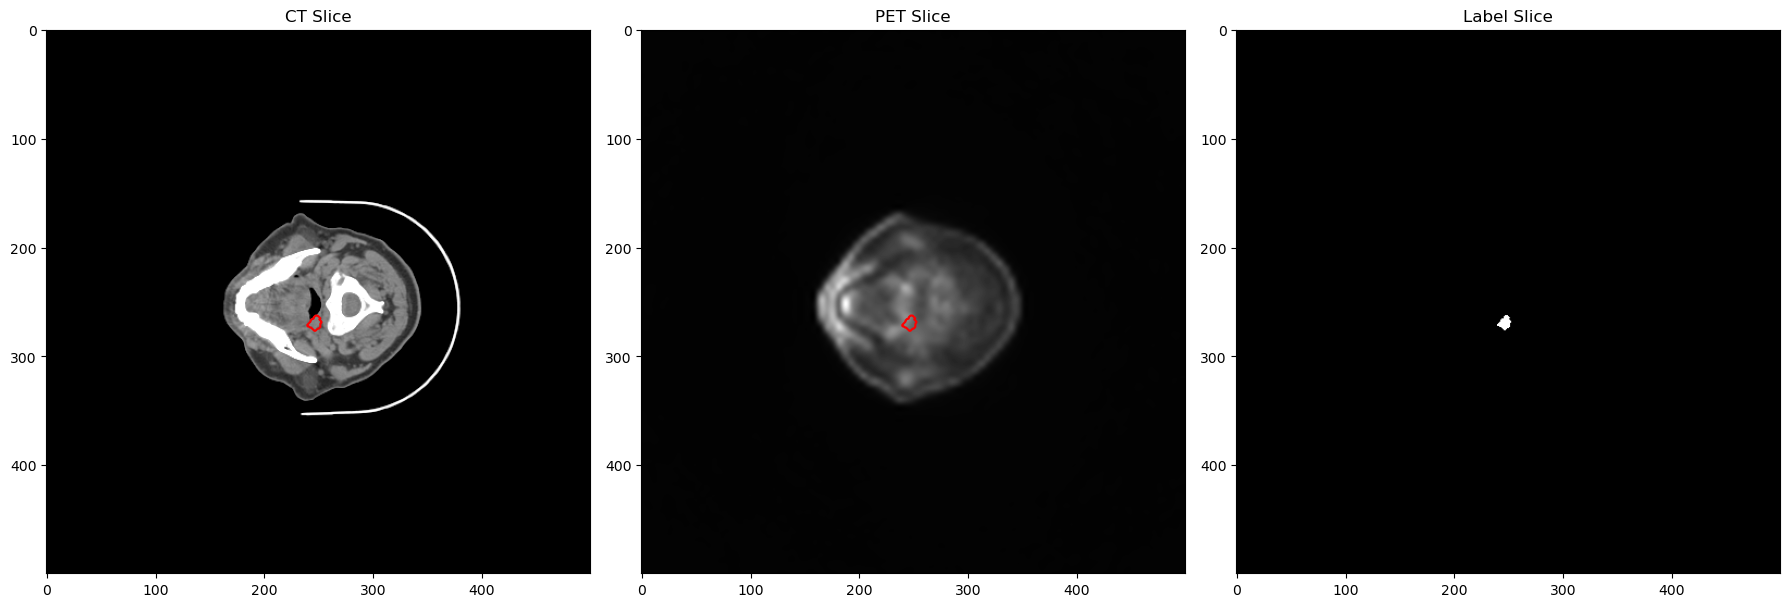

In [60]:
# Choose a slice index, for example, the middle slice
slice_index = 76  # Adjust based on your specific needs

# Extract the slices
ct_slice = ct_image[:, :, slice_index]  # Assuming the batch size is 1
pet_slice = pt_image[:, :, slice_index]
label_slice = lbl_image[:, :, slice_index]

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(ct_slice, cmap='gray')
axes[0].contour(label_slice, colors='red')
axes[0].set_title('CT Slice')
axes[1].imshow(pet_slice, cmap='gray')
axes[1].contour(label_slice, colors='red')
axes[1].set_title('PET Slice')
axes[2].imshow(label_slice, cmap='gray')
axes[2].set_title('Label Slice')

# for ax in axes:
#     ax.axis('off')

plt.tight_layout()
plt.show()

### Patchify the image

In [8]:
# Specify the patch size you want, e.g., (64, 64) for 2D patches or (64, 64, 64) for 3D patches
# patch_size = (64, 64)  # For 2D images
patch_size = (32, 32, 32)  # Uncomment this for 3D volumetric data

# Use patchify to extract patches
ct_patches = patchify(ct_image, patch_size, step=patch_size)  # step=patch_size for non-overlapping patches
pt_patches = patchify(pt_image, patch_size, step=patch_size)  # step=patch_size for non-overlapping patches
lbl_patches = patchify(lbl_image, patch_size, step=patch_size)  # step=patch_size for non-overlapping patches

# patches will have an additional dimension in the beginning for the number of patches extracted
print(ct_patches.shape)
print(pt_patches.shape)
print(lbl_patches.shape)

(15, 15, 3, 32, 32, 32)
(15, 15, 3, 32, 32, 32)
(15, 15, 3, 32, 32, 32)


### find a nonzero element

In [55]:
for i in range(lbl_patches.shape[0]):
    for j in range(lbl_patches.shape[1]):
        for k in range(lbl_patches.shape[2]):
            for l in range(lbl_patches.shape[5]):
            # print(i, j, k)
# ct_patch = ct_patches[patch_idx, patch_idy, patch_idz, :, :, slice_idx]
# pet_patch = pt_patches[patch_idx, patch_idy, patch_idz, :, :, slice_idx]
                patch_ = lbl_patches[i, j, k, :, :, l]
                if np.any(patch_ != 0):
                    print(i,j,k,l)

7 7 1 12
7 7 1 13
7 7 1 14
7 7 1 15
7 7 1 16
7 7 1 17
7 7 1 18
7 7 1 19
7 7 1 20
7 7 1 21
7 7 1 22
7 7 1 23
7 7 1 24
7 7 1 25
7 7 1 26
7 7 1 27
7 7 1 28
8 7 1 12
8 7 1 13
8 7 1 14
8 7 1 15
8 7 1 16
8 7 1 17
8 7 1 18
8 7 1 19
8 7 1 20
8 7 1 21
8 7 1 22
8 7 1 23
8 7 1 24
8 7 1 25
8 7 1 26
8 7 1 27
8 7 1 28
8 7 1 29
8 7 1 30
8 7 1 31
8 7 2 0
8 7 2 1
8 7 2 2
8 7 2 3
8 7 2 4
8 7 2 5
8 7 2 6
8 7 2 7
8 7 2 8
8 7 2 9
8 7 2 10
8 7 2 11
8 7 2 12
8 7 2 13
8 7 2 14
8 7 2 15
8 7 2 16
8 7 2 17
8 7 2 18


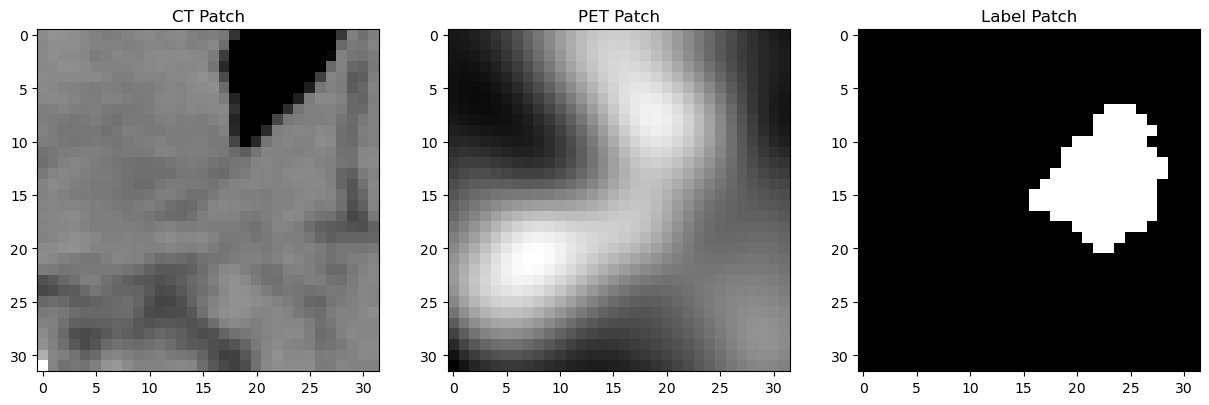

In [57]:
slice_idx = 12
patch_idx = 8
patch_idy = 7
patch_idz = 2
# Assuming ct_patches, pet_patches, and label_patches are your arrays with the specified dimensions
# Let's pick the first patch (0,0,0) and the middle slice (slice number 32) for visualization

ct_patch = ct_patches[patch_idx, patch_idy, patch_idz, :, :, slice_idx]
pet_patch = pt_patches[patch_idx, patch_idy, patch_idz, :, :, slice_idx]
label_patch = lbl_patches[patch_idx, patch_idy, patch_idz, :, :, slice_idx]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(ct_patch, cmap='gray')
axes[0].set_title('CT Patch')

axes[1].imshow(pet_patch, cmap='gray')
axes[1].set_title('PET Patch')

axes[2].imshow(label_patch, cmap='gray')
axes[2].set_title('Label Patch')

# for ax in axes:
#     ax.axis('off')  # Hide axes for clarity

plt.show()

# reconstructed_slice = unpatchify()

In [59]:
# Given values
patch_size = (32, 32, 32)  # Size of each patch
slice_idx_within_patch = 12  # The slice index within the patch
patch_idx = 8
patch_idy = 7
patch_idz = 2

# Calculate the starting Z-index for the patch in the original volume
start_slice_index = patch_idz * patch_size[2]

# Calculate the original slice index in the full volume
original_slice_index = start_slice_index + slice_idx_within_patch

print("The original slice index in the full volume is:", original_slice_index)


The original slice index in the full volume is: 76


### Save tiff stack for one image

In [61]:
df.columns

Index(['subject_id', 'dataset', 'ct_path', 'pet_path', 'label_path', 'set'], dtype='object')

In [96]:
subject_id = []
dataset = []
set = []
ct_path = []
pet_path = []
label_path = []

In [97]:
for i in range(ct_patches.shape[0]):  # Loop over the first dimension
    for j in range(ct_patches.shape[1]):  # Loop over the second dimension
        for k in range(patches.shape[2]):
            patch = ct_patches[i, j, k]  # Selecting the patch, ignoring the singleton dimension
            subject_id.append('MDA-020.tiff')
            dataset.append('source')
            ct_path.append(f'../datasets/ADDA/tiff_patches/images/MDA-020__CT_{i}_{j}_{k}.tiff')
            
            filename = f'../../datasets/ADDA/tiff_patches/images/MDA-020__CT_{i}_{j}_{k}.tiff'  # Creating a filename for the patch
            tif.imwrite(filename, patch)
            # ../../datasets/ADDA/tiff_patchees/images/MDA-020__CT.tiff

In [98]:
# For PET patches
for i in range(pt_patches.shape[0]):
    for j in range(pt_patches.shape[1]):
        for k in range(patches.shape[2]):
            patch = pt_patches[i, j, k]
            pet_path.append(f'../datasets/ADDA/tiff_patches/images/MDA-020__PT_{i}_{j}_{k}.tiff')
            filename = f'../../datasets/ADDA/tiff_patches/images/MDA-020__PT_{i}_{j}_{k}.tiff'
            tif.imwrite(filename, patch)

# For Label patches
for i in range(lbl_patches.shape[0]):
    for j in range(lbl_patches.shape[1]):
        for k in range(patches.shape[2]):
            patch = lbl_patches[i, j, k]
            label_path.append(f'../datasets/ADDA/tiff_patches/labels/MDA-020_{i}_{j}_{k}.tiff')
            filename = f'../../datasets/ADDA/tiff_patches/labels/MDA-020_{i}_{j}_{k}.tiff'
            tif.imwrite(filename, patch)


In [99]:
train_csv = pd.DataFrame({
    'subject_id':subject_id, 
    'dataset':dataset, 
    'ct_path':ct_path, 
    'pet_path':pet_path, 
    'label_path':label_path
})

In [100]:
train_csv.shape

(225, 5)

In [111]:
train_csv['ct_path'][0]

'../datasets/ADDA/tiff_patches/images/MDA-020__CT_0_0_0.tiff'

In [101]:
train_csv.to_csv('../../datasets/ADDA/tiff_patches/training_file.csv', index=False)

## Save All images

In [186]:
# reading images from df that contains training information for the complete image set
# including source and target
df.head()

,subject_id,dataset,ct_path,pet_path,label_path,set
0,MDA-039.tiff,source,../../datasets/ADDA/tiff/images/MDA-039__CT.tiff,../../datasets/ADDA/tiff/images/MDA-039__PT.tiff,../../datasets/ADDA/tiff/labels/MDA-039.tiff,train
1,MDA-192.tiff,source,../../datasets/ADDA/tiff/images/MDA-192__CT.tiff,../../datasets/ADDA/tiff/images/MDA-192__PT.tiff,../../datasets/ADDA/tiff/labels/MDA-192.tiff,train
2,MDA-187.tiff,source,../../datasets/ADDA/tiff/images/MDA-187__CT.tiff,../../datasets/ADDA/tiff/images/MDA-187__PT.tiff,../../datasets/ADDA/tiff/labels/MDA-187.tiff,train
3,MDA-179.tiff,source,../../datasets/ADDA/tiff/images/MDA-179__CT.tiff,../../datasets/ADDA/tiff/images/MDA-179__PT.tiff,../../datasets/ADDA/tiff/labels/MDA-179.tiff,train
4,MDA-162.tiff,source,../../datasets/ADDA/tiff/images/MDA-162__CT.tiff,../../datasets/ADDA/tiff/images/MDA-162__PT.tiff,../../datasets/ADDA/tiff/labels/MDA-162.tiff,train


In [187]:
def read_and_patchify(path_ct, path_pet, path_label, patch_size = (32, 32, 32)):
    # Read the TIFF file
    ct_image = tif.imread(path_ct)
    pt_image = tif.imread(path_pet)
    lbl_image = tif.imread(path_label)
    
    # Use patchify to extract patches
    ct_patches = patchify(ct_image, patch_size, step=patch_size)  # step=patch_size for non-overlapping patches
    pt_patches = patchify(pt_image, patch_size, step=patch_size)  # step=patch_size for non-overlapping patches
    lbl_patches = patchify(lbl_image, patch_size, step=patch_size)  # step=patch_size for non-overlapping patches
    
    # patches will have an additional dimension in the beginning for the number of patches extracted
    # print(ct_patches.shape)
    # print(pt_patches.shape)
    # print(lbl_patches.shape)

    return ct_patches, pt_patches, lbl_patches

In [188]:
def save_and_update_training_csv(patches, name, dataset_name, set_name):

    # work on CT patches
    for i in range(patches[0].shape[0]):  # Loop over the first dimension
        for j in range(patches[0].shape[1]):  # Loop over the second dimension
            for n, k in enumerate(range(patches[0].shape[2])):
                # get the CT patch
                patch = patches[0][i, j, k]  # Selecting the patch, ignoring the singleton dimension
                # update training csv for CT info
                subject_id.append(name)
                dataset.append(dataset_name)
                set_.append(set_name)
                
                # update ct file names in the training csv relevant to the training file
                ct_save_path = f'../datasets/ADDA/tiff_patches/images/{name}__CT_{i}_{j}_{k}.tiff'
                ct_path.append(ct_save_path)
                # save the image to the correct location relevant to this notebook
                cfilename = f'../../datasets/ADDA/tiff_patches/images/{name}__CT_{i}_{j}_{k}.tiff'  # Creating a filename for the patch
                # print(ct_save_path)
                # print(cfilename, '\n')
                tif.imwrite(cfilename, patch)
                # if n==4:
                #     break
        #     break
        # break

    # work on PET patches
    for i in range(patches[1].shape[0]):  # Loop over the first dimension
        for j in range(patches[1].shape[1]):  # Loop over the second dimension
            for n, k in enumerate(range(patches[1].shape[2])):
                # get the PET patch
                patch = patches[1][i, j, k]  # Selecting the patch, ignoring the singleton dimension
                
                # update pet file names in the training csv relevant to the training file
                pet_save_path = f'../datasets/ADDA/tiff_patches/images/{name}__PT_{i}_{j}_{k}.tiff'
                pet_path.append(pet_save_path)
                # save the image to the correct location relevant to this notebook
                pfilename = f'../../datasets/ADDA/tiff_patches/images/{name}__PT_{i}_{j}_{k}.tiff'  # Creating a filename for the patch
                # print(pet_save_path)
                # print(pfilename, '\n')
                tif.imwrite(pfilename, patch)
        #         if n==4:
        #             break
        #     break
        # break

    # work on Labels patches
    for i in range(patches[2].shape[0]):  # Loop over the first dimension
        for j in range(patches[2].shape[1]):  # Loop over the second dimension
            for n, k in enumerate(range(patches[2].shape[2])):
                # get the PET patch
                patch = patches[2][i, j, k]  # Selecting the patch, ignoring the singleton dimension
                
                # update label file names in the training csv relevant to the training file
                label_save_path = f'../datasets/ADDA/tiff_patches/labels/{name}_{i}_{j}_{k}.tiff'
                label_path.append(label_save_path)
                # save the image to the correct location relevant to this notebook
                lfilename = f'../../datasets/ADDA/tiff_patches/labels/{name}_{i}_{j}_{k}.tiff'  # Creating a filename for the patch
                # print(label_save_path)
                # print(lfilename, '\n')
                tif.imwrite(lfilename, patch)
        #         if n==4:
        #             break
        #     break
        # break

    

In [194]:
# initialize lists
subject_id = []
dataset = []
set_ = []
ct_path = []
pet_path = []
label_path = []

# cycle through all the subjects
out = 0
for i in range(df.shape[0]):
    # subject name
    subject_name = df.iloc[i]['subject_id'].split('.')[0]
    dataset_name = df.iloc[i]['dataset']
    set_type = df.iloc[i]['set']
    print(f'{out}/{df.shape[0]} -> ', subject_name, dataset_name, set_type)
    ct_pa = df.iloc[i]['ct_path']
    pt_pa = df.iloc[i]['pet_path']
    lb_pa = df.iloc[i]['label_path']
    # print(ct_pa)
    # print(pt_pa)
    # print(lb_pa)
    # read and patchify image 
    ct_patches, pet_patches, label_patches = read_and_patchify(ct_pa, pt_pa, lb_pa)
    
    # update the training csv_file 
    save_and_update_training_csv((ct_patches, pet_patches, label_patches), subject_name, dataset_name, set_type)


    out += 1
    # if out == 10:
    #     break

print('\n completed...',)

# save the training csv for patches 
patch_train_csv = pd.DataFrame({
    'subject_id':subject_id, 
    'dataset':dataset, 
    'set': set_,
    'ct_path':ct_path, 
    'pet_path':pet_path, 
    'label_path':label_path
})

patch_train_csv.to_csv('../../datasets/ADDA/tiff_patches/patch_training_file.csv', index=False)

0/256 ->  MDA-039 source train
1/256 ->  MDA-192 source train
2/256 ->  MDA-187 source train
3/256 ->  MDA-179 source train
4/256 ->  MDA-162 source train
5/256 ->  MDA-097 source train
6/256 ->  MDA-194 source train
7/256 ->  MDA-095 source train
8/256 ->  MDA-038 source train
9/256 ->  MDA-147 source train
10/256 ->  MDA-150 source train
11/256 ->  MDA-133 source train
12/256 ->  MDA-071 source train
13/256 ->  MDA-113 source train
14/256 ->  MDA-023 source train
15/256 ->  MDA-024 source train
16/256 ->  MDA-013 source train
17/256 ->  MDA-059 source train
18/256 ->  MDA-006 source train
19/256 ->  MDA-101 source train
20/256 ->  MDA-065 source train
21/256 ->  MDA-120 source train
22/256 ->  MDA-163 source train
23/256 ->  MDA-064 source train
24/256 ->  MDA-025 source train
25/256 ->  MDA-088 source train
26/256 ->  MDA-098 source train
27/256 ->  MDA-099 source train
28/256 ->  MDA-078 source train
29/256 ->  MDA-020 source train
30/256 ->  MDA-100 source train
31/256 ->  MDA-021

## summarize training file 

In [196]:
patch_train_csv.shape

(172800, 6)

In [197]:
patch_train_csv.head()

,subject_id,dataset,set,ct_path,pet_path,label_path
0,MDA-039,source,train,../datasets/ADDA/tiff_patches/images/MDA-039__...,../datasets/ADDA/tiff_patches/images/MDA-039__...,../datasets/ADDA/tiff_patches/labels/MDA-039_0...
1,MDA-039,source,train,../datasets/ADDA/tiff_patches/images/MDA-039__...,../datasets/ADDA/tiff_patches/images/MDA-039__...,../datasets/ADDA/tiff_patches/labels/MDA-039_0...
2,MDA-039,source,train,../datasets/ADDA/tiff_patches/images/MDA-039__...,../datasets/ADDA/tiff_patches/images/MDA-039__...,../datasets/ADDA/tiff_patches/labels/MDA-039_0...
3,MDA-039,source,train,../datasets/ADDA/tiff_patches/images/MDA-039__...,../datasets/ADDA/tiff_patches/images/MDA-039__...,../datasets/ADDA/tiff_patches/labels/MDA-039_0...
4,MDA-039,source,train,../datasets/ADDA/tiff_patches/images/MDA-039__...,../datasets/ADDA/tiff_patches/images/MDA-039__...,../datasets/ADDA/tiff_patches/labels/MDA-039_0...


In [198]:
patch_train_csv[['dataset', 'set']].value_counts().sort_index()

dataset  set       
source   test          18900
         train         86400
         validation    18900
target   test          10125
         train         33750
         validation     4725
Name: count, dtype: int64

In [199]:
df[['dataset', 'set']].value_counts().sort_index()

dataset  set       
source   test           28
         train         128
         validation     28
target   test           15
         train          50
         validation      7
Name: count, dtype: int64